함수만들기
제곱 함수와 n제곱 함수 만들기

In [2]:
def my_sq(x):
    return x**2

In [3]:
def my_exp(x,n):
    return x**n

In [4]:
my_sq(4)

16

In [5]:
my_exp(2,4)

16

시리즈와 데이터 프레임에 apply메서드 사용하기

시리즈와 apply메서드

In [7]:
import pandas as pd
df=pd.DataFrame({"a":[10,20,30],"b":[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [10]:
df["a"]**2

0    100
1    400
2    900
Name: a, dtype: int64

In [12]:
df["new1"]=df["a"].apply(my_sq)
df

,a,b,new1
0,10,20,100
1,20,30,400
2,30,40,900


In [14]:
df["new2"]=df["a"].apply(my_exp,n=2)
df

,a,b,new1,new2
0,10,20,100,100
1,20,30,400,400
2,30,40,900,900


In [15]:
df["new3"]=df["a"].apply(my_exp,n=3)
df

,a,b,new1,new2,new3
0,10,20,100,100,1000
1,20,30,400,400,8000
2,30,40,900,900,27000


데이터 프레임과 apply메서드


In [17]:
df=pd.DataFrame({"a":[10,20,30],"b":[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [18]:
def print_me(x):
    print(x)

In [19]:
df.apply(print_me,axis=0)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [20]:
def avg_3(x,y,z):
    return (x+y+z)/3

In [23]:
print(df.apply(avg_3,y=3,z=4))

           a          b
0   5.666667   9.000000
1   9.000000  12.333333
2  12.333333  15.666667


In [26]:
def avg_3_apply(col):
    x=col[0]
    y=col[1]
    z=col[2]
    return (x+y+z)/3
print(df.apply(avg_3_apply))

a    20.0
b    30.0
dtype: float64


In [33]:
def avg_3_apply(col):
    sum=0
    for item in col:
        sum+=item
    return sum/df.shape[0]
print(df.apply(avg_3_apply))

a          20.000000
b          30.000000
average    16.666667
dtype: float64


In [34]:
def avg_2_apply(row):
    sum=0
    for item in row:
        sum+=item
    return sum/df.shape[1]
print(df.apply(avg_2_apply))

a          20.000000
b          30.000000
average    16.666667
dtype: float64


In [36]:
df["average"]=df.apply(avg_2_apply,axis=1)
df

,a,b,average
0,10,20,14.444444
1,20,30,24.074074
2,30,40,33.703704


데이터프레임의 누락값을 처리한 다음 apply메서드 사용하기
데이터 프레임의 누락값 처리하기 -열 방향

In [38]:
import seaborn as sns
titanic=sns.load_dataset("titanic")

In [40]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [42]:
import numpy as np
def count_missing(vec):
    null_vec=pd.isnull(vec)
    null_count=np.sum(null_vec)
    return null_count

In [44]:
cmis_col=titanic.apply(count_missing)
print(cmis_col)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [46]:
def prop_missing(vec):
    num=count_missing(vec)
    dem=vec.size
    return num/dem

In [47]:
#177/891
titanic.age.size

891

In [49]:
pmis_col=titanic.apply(prop_missing)
print(pmis_col)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


In [50]:
def prop_complete(vec):
    return 1-prop_missing(vec)

In [ ]:
데이터프레임의 누락값을 처리하기 -행방향


In [52]:
cmis_row=titanic.apply(count_missing,axis=1)
pmis_row=titanic.apply(prop_missing,axis=1)
pcom_row=titanic.apply(prop_complete,axis=1)

print(cmis_row.head())
print(pmis_row.head())
print(pcom_row.head())

0    1
1    0
2    1
3    0
4    1
dtype: int64
0    0.066667
1    0.000000
2    0.066667
3    0.000000
4    0.066667
dtype: float64
0    0.933333
1    1.000000
2    0.933333
3    1.000000
4    0.933333
dtype: float64


In [54]:
titanic["num_missing"]=titanic.apply(count_missing,axis=1)
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  num_missing  
0    man        True  NaN  Southampton    no  False            1  
1  woman       False    C    Cherbourg   yes  False            0  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            0  
4    man        True  NaN  Southampton    no   True            1  


In [61]:
titanic[titanic["num_missing"]>=2].head()
titanic[titanic.num_missing>=2].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,num_missing
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,2
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,2
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,2
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,2
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,2


In [188]:
student=[{"name":"A","birth":"1999-06-27","mid":95,"fin":85},
         {"name":"B","birth":"1997-06-27","mid":85,"fin":80},
         {"name":"C","birth":"1998-06-27","mid":10,"fin":30},
         {"name":"D","birth":"2000-06-27","mid":73,"fin":90}]
df=pd.DataFrame(student,columns=["name","birth","mid","fin"])
df

,name,birth,mid,fin
0,A,1999-06-27,95,85
1,B,1997-06-27,85,80
2,C,1998-06-27,10,30
3,D,2000-06-27,73,90


In [189]:
def tot(vec):
    return vec['mid']+vec['fin']

df['tot'] = df.apply(tot, axis = 1)
df

,name,birth,mid,fin,tot
0,A,1999-06-27,95,85,180
1,B,1997-06-27,85,80,165
2,C,1998-06-27,10,30,40
3,D,2000-06-27,73,90,163


In [190]:
#2
def avg(vec):
    return tot(vec)/2
df["avg"]=df.apply(avg, axis = 1)
df

,name,birth,mid,fin,tot,avg
0,A,1999-06-27,95,85,180,90.0
1,B,1997-06-27,85,80,165,82.5
2,C,1998-06-27,10,30,40,20.0
3,D,2000-06-27,73,90,163,81.5


In [191]:
def grade(a):
    if a>=90:
        return "A"
    elif a>=80:
        return "B"
    elif a>=70:
        return "C"
    else:
        return "F"

    
df["grade"]=df["avg"].apply(grade)
df

,name,birth,mid,fin,tot,avg,grade
0,A,1999-06-27,95,85,180,90.0,A
1,B,1997-06-27,85,80,165,82.5,B
2,C,1998-06-27,10,30,40,20.0,F
3,D,2000-06-27,73,90,163,81.5,B


In [192]:
def pf(a):
    if a in ["A","B","C"]:
        return "합격"
    else:
        return "불합격"
df["grade1"]=df["grade"].apply(pf)
df

,name,birth,mid,fin,tot,avg,grade,grade1
0,A,1999-06-27,95,85,180,90.0,A,합격
1,B,1997-06-27,85,80,165,82.5,B,합격
2,C,1998-06-27,10,30,40,20.0,F,불합격
3,D,2000-06-27,73,90,163,81.5,B,합격


In [193]:
def year(a):
    return a.split("-")[0]
df["year"]=df["birth"].apply(year)
df


,name,birth,mid,fin,tot,avg,grade,grade1,year
0,A,1999-06-27,95,85,180,90.0,A,합격,1999
1,B,1997-06-27,85,80,165,82.5,B,합격,1997
2,C,1998-06-27,10,30,40,20.0,F,불합격,1998
3,D,2000-06-27,73,90,163,81.5,B,합격,2000


In [194]:
def age(a):
    return 2020-int(a)+1
df["age"]=df["year"].apply(age)
df

,name,birth,mid,fin,tot,avg,grade,grade1,year,age
0,A,1999-06-27,95,85,180,90.0,A,합격,1999,22
1,B,1997-06-27,85,80,165,82.5,B,합격,1997,24
2,C,1998-06-27,10,30,40,20.0,F,불합격,1998,23
3,D,2000-06-27,73,90,163,81.5,B,합격,2000,21


In [195]:
df[df.age>=22]

,name,birth,mid,fin,tot,avg,grade,grade1,year,age
0,A,1999-06-27,95,85,180,90.0,A,합격,1999,22
1,B,1997-06-27,85,80,165,82.5,B,합격,1997,24
2,C,1998-06-27,10,30,40,20.0,F,불합격,1998,23


In [196]:
df_1=df[df["age"]>=22]
df_1[df_1["name"]=="A"]


,name,birth,mid,fin,tot,avg,grade,grade1,year,age
0,A,1999-06-27,95,85,180,90.0,A,합격,1999,22


In [199]:
a=df[(df.age>=22) & (df.name=="A")]
a

,name,birth,mid,fin,tot,avg,grade,grade1,year,age
0,A,1999-06-27,95,85,180,90.0,A,합격,1999,22


In [162]:
df.loc[:, 'birth':'grade']

,birth,mid,fin,tot,avg,grade
0,1999-06-27,95,85,180,90.0,A
1,1997-06-27,85,80,165,82.5,B
2,1998-06-27,10,30,40,20.0,F
3,2000-06-27,73,90,163,81.5,B


In [164]:
df[["name","grade"]]

,name,grade
0,A,A
1,B,B
2,C,F
3,D,B


In [183]:
cname =[]
for i in df.columns:
    if 'i' in i:
        cname.append(i)
df[cname]

,birth,mid,fin
0,1999-06-27,95,85
1,1997-06-27,85,80
2,1998-06-27,10,30
3,2000-06-27,73,90


In [185]:
filter1=df.filter(like="i",axis=1)
filter1

,birth,mid,fin
0,1999-06-27,95,85
1,1997-06-27,85,80
2,1998-06-27,10,30
3,2000-06-27,73,90


In [ ]:
groupby 메서드로 평균값 구하기

In [203]:
import pandas as pd
df=pd.read_csv("../data/gapminder.tsv",sep="\t")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [206]:
avg_life_exp_by_year=df.groupby("year").lifeExp.mean()
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [ ]:
분할-반영 -결합 과정 살펴보기


In [207]:
#분할
years=df.year.unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [209]:
y1952=df.loc[df.year==1952,:]
print(y1952.head())

        country continent  year  lifeExp       pop    gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333   779.445314
12      Albania    Europe  1952   55.230   1282697  1601.056136
24      Algeria    Africa  1952   43.077   9279525  2449.008185
36       Angola    Africa  1952   30.015   4232095  3520.610273
48    Argentina  Americas  1952   62.485  17876956  5911.315053


In [212]:

y1952_mean=y1952.lifeExp.mean()
print(y1952_mean)

49.05761971830987


In [215]:
y1957=df.loc[df.year==1957,:]
y1957_mean=y1957.lifeExp.mean()
print(y1957_mean)

y1962=df.loc[df.year==1962,:]
y1962_mean=y1962.lifeExp.mean()
print(y1962_mean)

51.50740112676054
53.60924901408449


In [217]:
df2=pd.DataFrame({"year":[1952,1957,1962],
                 "":[y1952_mean,y1957_mean,y1962_mean]})
print(df2)

   year           
0  1952  49.057620
1  1957  51.507401
2  1962  53.609249


In [ ]:
평균값을 구하는 사용자 함수와 groupby메서드

In [218]:
def my_mean(values):
    n=len(values)
    sum=0
    for value in values:
        sum+=value
    return sum/n

In [221]:
#mean()사용
avg_life_exp_by_year=df.groupby("year").lifeExp.mean()
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [223]:
#agg는 apply와 비슷하며 groupby가 사용될때 사용
agg_my_mean=df.groupby("year").lifeExp.agg(my_mean)
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


두개의 인잣값을 받아 처리하는 사용자 함수 와 groupby메서드
함수이름:my_mean_diff
연도별 평균수명-전체 평균 수명을 뺀 값을 구하세요
1.인자 함수이름,2.인자 전체 평균수명

In [228]:
def my_mean_diff(values,diff_value):
    n=len(values)
    sum=0
    for value in values:
        sum+=value
    mean=sum/n
    return mean-diff_value  

In [230]:
global_mean=df.lifeExp.mean()
print(global_mean)

59.47443936619713


In [238]:
agg_mean_diff=df.groupby("year").lifeExp.agg(my_mean_diff,diff_value=global_mean)
print(agg_mean_diff)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


집계 메서드를 리스트 딕셔너리에 담아 전달하기

In [240]:
import numpy as np
gdf=df.groupby("year").lifeExp.agg([np.count_nonzero,np.mean,np.std])
print(gdf)

      count_nonzero       mean        std
year                                     
1952          142.0  49.057620  12.225956
1957          142.0  51.507401  12.231286
1962          142.0  53.609249  12.097245
1967          142.0  55.678290  11.718858
1972          142.0  57.647386  11.381953
1977          142.0  59.570157  11.227229
1982          142.0  61.533197  10.770618
1987          142.0  63.212613  10.556285
1992          142.0  64.160338  11.227380
1997          142.0  65.014676  11.559439
2002          142.0  65.694923  12.279823
2007          142.0  67.007423  12.073021


In [241]:
gdf_dict=df.groupby("year").agg({"lifeExp":"mean","pop":"median","gdpPercap":"median"})
print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334741
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371109


In [242]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
표준점수 계산하기

In [245]:
#데이터의 평균과 표준편차의 차이를 표준점수
def my_zscore(x):
    return (x-x.mean())/x.std()

In [246]:
#데이터 변환
#데이터를 표준화 할 뿐 집계는 하지 않음 데이터 양이 줄어들지 않는다
transform_z=df.groupby("year").lifeExp.transform(my_zscore)
print(transform_z.head())

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64


In [247]:
print(df.shape)

(1704, 6)


In [248]:
print(transform_z.shape)

(1704,)


In [249]:
누락값을 평균값으로 처리하기


SyntaxError: invalid syntax (<ipython-input-249-3e75b8508da4>, line 1)

In [252]:
#랜덤 4명에게 nan넣어라
import seaborn as sns
import numpy as np
np.random.seed(42)
tips_10=sns.load_dataset("tips").sample(10)
tips_10.loc[np.random.permutation(tips_10.index)[:4],"total_bill"]=np.NaN
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
176         NaN  3.18    Male     No   Sat  Dinner     2
211         NaN  2.00    Male     No   Sun  Dinner     2
198         NaN  2.00    Male     No   Sun  Dinner     4
153         NaN  5.16    Male    Yes   Sat  Dinner     4
101       13.00  2.00  Female    Yes  Thur   Lunch     2
6         17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
24        14.78  3.23    Male     No   Sun  Dinner     2
9         15.38  3.00  Female    Yes   Fri  Dinner     2


In [254]:
##누락값 
count_sex=tips_10.groupby("sex").count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             3    7       7    7     7     7
Female           3    3       3    3     3     3


In [255]:
def fill_na_mean(x):
    avg=x.mean()
    return x.fillna(avg)

In [258]:
total_bill_group_mean=tips_10.groupby("sex").total_bill.transform(fill_na_mean)
tips_10["fill_total_bill"]=total_bill_group_mean
print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
176         NaN  3.18    Male     No   Sat  Dinner     2            20.37
211         NaN  2.00    Male     No   Sun  Dinner     2            20.37
198         NaN  2.00    Male     No   Sun  Dinner     4            20.37
153         NaN  5.16    Male    Yes   Sat  Dinner     4            20.37
101       13.00  2.00  Female    Yes  Thur   Lunch     2            13.00
6         17.89  2.00    Male    Yes   Sun  Dinner     2            17.89
192       28.44  2.56    Male    Yes  Thur   Lunch     2            28.44
124       12.48  2.52  Female     No  Thur   Lunch     2            12.48
24        14.78  3.23    Male     No   Sun  Dinner     2            14.78
9         15.38  3.00  Female    Yes   Fri  Dinner     2            15.38


In [ ]:
데이터 필토링 사용하기 filter메서드

In [260]:
tips=sns.load_dataset("tips")
print(tips.shape)

(244, 7)


In [261]:
tips["size"].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [262]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [263]:
tips_filltered=tips.groupby("size").filter(lambda x:x["size"].count()>=30)

In [266]:
print(tips_filltered.shape)

(231, 7)


In [267]:
print(tips_filltered["size"].value_counts())

2    156
3     38
4     37
Name: size, dtype: int64


In [ ]:
그룹 오브젝트 저장하여 살펴보기

In [268]:
tips_10=sns.load_dataset("tips").sample(10,random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [269]:
#자료형이 그룹 오브젝트임을 확인
grouped=tips_10.groupby("sex")
print(grouped)

In [270]:
#그룹 오브젝트에 포함된 그룹을 보려면 groups속성
print(grouped.groups)

{'Male': Int64Index([24, 6, 153, 211, 176, 192, 9], dtype='int64'), 'Female': Int64Index([198, 124, 101], dtype='int64')}


In [ ]:
그룹오브젝트의 평균 구하기

In [271]:
avgs=grouped.mean()
print(avgs)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


In [277]:
bill_sex_time=tips_10.groupby(["sex","time"])
group_avg=bill_sex_time.mean()
print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [280]:
print(type(group_avg))

<class 'pandas.core.frame.DataFrame'>


In [281]:
print(group_avg.columns)

Index(['total_bill', 'tip', 'size'], dtype='object')


In [289]:
group_method=tips_10.groupby(["sex","time"]).mean().reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [287]:
group_param=tips_10.groupby(["sex","time"],as_index=False).mean()
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [ ]:
그룹 오브젝트 활용 참고
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [ ]:
import glob
import os

file_list = glob.glob(../data/dust/yob*.txt)

for file_path in file_list:
    year = os.path.basename(file_path).split('yob')[0].split('.txt')[0]
    data = pd.read_csv(file_path, encoding='cp949', header=None)
    data['year'] = year

In [290]:
import glob
import os

In [295]:
file_list = glob.glob("../data/dust/*")

In [296]:
file_list

['../data/dust\\april_4.csv',
 '../data/dust\\august_8.csv',
 '../data/dust\\december_12.csv',
 '../data/dust\\feburary_2.csv',
 '../data/dust\\january_1.csv',
 '../data/dust\\july_7.csv',
 '../data/dust\\june_6.csv',
 '../data/dust\\march_3.csv',
 '../data/dust\\may_5.csv',
 '../data/dust\\november_11.csv',
 '../data/dust\\october_10.csv',
 '../data/dust\\september_9.csv',
 '../data/dust\\미세먼지 인덱스.txt']

In [308]:
file_list = glob.glob("../data/dust/*.csv")
file_list
all_data = pd.DataFrame()
for file_path in file_list:
    data = pd.read_csv(file_path, encoding='cp949',sep=",")
    all_data=pd.concat([all_data, data], axis=0)

In [309]:
all_data

,Unnamed: 0,...1,X1,X2,X3,X4,X5,X6,X7,X8,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,4,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,5,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
5,6,광진구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
6,7,동대문구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
7,8,중랑구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
8,9,성북구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
9,10,강북구,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0


In [315]:
all_data['...1']

0     서울시 평균
1        종로구
2         중구
3        용산구
4        성동구
5        광진구
6       동대문구
7        중랑구
8        성북구
9        강북구
10       도봉구
11       노원구
12       은평구
13      서대문구
14       마포구
15       양천구
16       강서구
17       구로구
18       금천구
19      영등포구
20       동작구
21       관악구
22       서초구
23       강남구
24       송파구
25       강동구
0     서울시 평균
1        종로구
2         중구
3        용산구
       ...  
22       서초구
23       강남구
24       송파구
25       강동구
0     서울시 평균
1        종로구
2         중구
3        용산구
4        성동구
5        광진구
6       동대문구
7        중랑구
8        성북구
9        강북구
10       도봉구
11       노원구
12       은평구
13      서대문구
14       마포구
15       양천구
16       강서구
17       구로구
18       금천구
19      영등포구
20       동작구
21       관악구
22       서초구
23       강남구
24       송파구
25       강동구
Name: ...1, Length: 312, dtype: object

In [323]:
all_data_1=all_data[all_data['...1']!="서울시 평균"]

all_data_1.head()

,Unnamed: 0,...1,X1,X2,X3,X4,X5,X6,X7,X8,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,4,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,5,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
5,6,광진구,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [329]:
all_data_2=all_data_1.loc[:,"...1":"X31"]

In [330]:
all_data_2=pd.melt(all_data_2,id_vars="...1")
all_data_2

,...1,variable,value
0,종로구,X1,1.0
1,중구,X1,1.0
2,용산구,X1,2.0
3,성동구,X1,2.0
4,광진구,X1,2.0
5,동대문구,X1,2.0
6,중랑구,X1,2.0
7,성북구,X1,2.0
8,강북구,X1,2.0
9,도봉구,X1,2.0


In [351]:
all_data_3=all_data_2.loc[:,["...1","value"]]
all_data_3

,...1,value
0,종로구,1.0
1,중구,1.0
2,용산구,2.0
3,성동구,2.0
4,광진구,2.0
5,동대문구,2.0
6,중랑구,2.0
7,성북구,2.0
8,강북구,2.0
9,도봉구,2.0


In [352]:
all_data_4=all_data_3.dropna(axis=0)
all_data_4

,...1,value
0,종로구,1.0
1,중구,1.0
2,용산구,2.0
3,성동구,2.0
4,광진구,2.0
5,동대문구,2.0
6,중랑구,2.0
7,성북구,2.0
8,강북구,2.0
9,도봉구,2.0


In [353]:
all_data_4["count"]=1

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
all_data_4

,...1,value,count
0,종로구,1.0,1
1,중구,1.0,1
2,용산구,2.0,1
3,성동구,2.0,1
4,광진구,2.0,1
5,동대문구,2.0,1
6,중랑구,2.0,1
7,성북구,2.0,1
8,강북구,2.0,1
9,도봉구,2.0,1


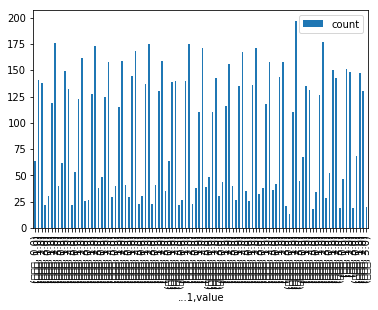

In [363]:
all_data_4.groupby(["...1","value"]).count().plot.bar()

In [372]:
all_data_5=all_data_4.groupby(["...1","value"]).count().reset_index()
all_data_5.head()

,...1,value,count
0,강남구,0.0,64
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,30


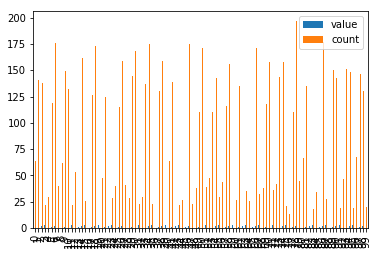

In [374]:
all_data_5.plot.bar()

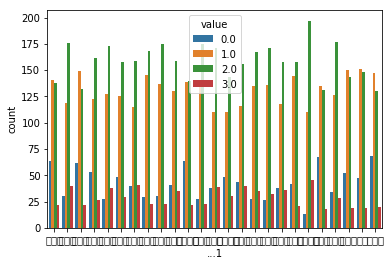

In [389]:
import matplotlib.pyplot as plt
sns.barplot(x='...1',y="count",hue="value",data=all_data_5)
plt.show()

In [390]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import  font_manager,rc
plt.rcParams["axes.unicode_minus"]=False

#f_path="/Library/Fonts/AppleGothic.ttf"(맥)
f_path="C:/Windows/Fonts/malgun.ttf" #(윈도우)
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc("font",family=font_name)

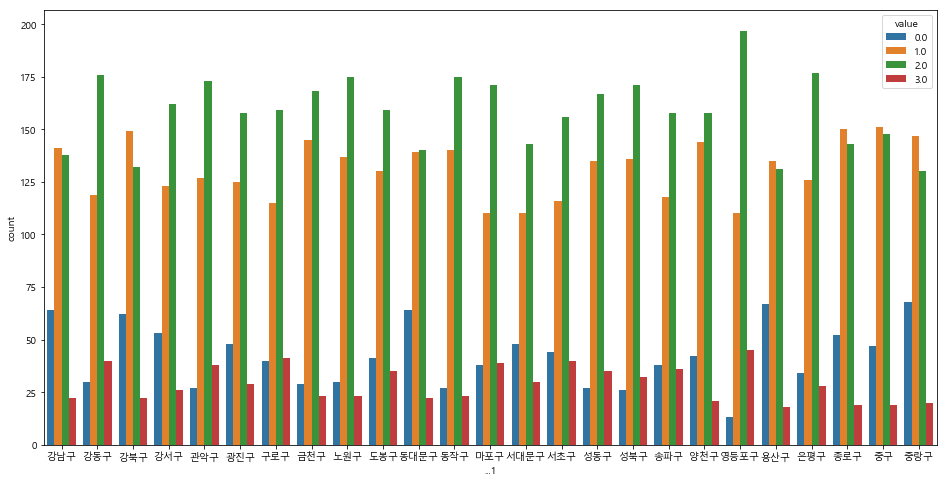

In [393]:
import matplotlib.pyplot as plt
ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='...1',y="count",hue="value",data=all_data_5)
plt.show()